Задача 2. 55 баллов Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA Скачайте его.

In [1]:
import pandas as pd
import numpy as np
import os, sys, json
import urllib.parse as ul

def get_CSV_FromYandex(url):
    base_url = 'https://cloud-api.yandex.net:443/v1/disk/public/resources/download?public_key='
    folder = '.'
    res = os.popen('wget -qO - {}{}'.format(base_url, url)).read()
    json_res = json.loads(res)
    filename = ul.parse_qs(ul.urlparse(json_res['href']).query)['filename'][0]
    os.system("wget '{}' -P '{}' -O '{}'".format(json_res['href'], folder, filename))
    return filename


df = pd.read_csv(get_CSV_FromYandex('https://disk.yandex.ru/d/P6u1Za-nnmtwPA'), index_col=0)

Оцениваем факторы, которые влияют на цену на аренду в Москве. Описание столбцов: metro - ближайшая станция метро price - цена за аренды minutes - расстояние до метро в минутах way - пусть до метро (пешком или на транспорте) views - просмотры квартиры provider - кто сдает квартиру (собственник, риелтор, застройщик) fee_percent - процент, который получает риелтор storey- этаж storeys- число этажей в здании living_area - жилая площаль kitchen_area - площадь кухни total_area - общая площадь

Часть 1. EDA. 30 баллов

Отобразите первые 5 и последние 5 строк. (1)

Посчитайте описательные статистики числовых переменных с помощью describe() (1)

In [26]:
df[df['way'] == 'transport']['minutes'].mean()

12.257142857142858

In [3]:
df.describe(include = 'number')

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (1)

In [4]:
df.describe(include = 'object')

,metro,way,provider
count,1446,1446,1446
unique,119,2,7
top,Planernaia,walk,realtor
freq,126,1331,615


Есть ли в датасете пропуски? (1)

In [5]:
df.isna().sum().sum() > 0

False

Есть ли в датасете полные дубликаты? (2)

In [6]:
df.duplicated().sum() > 0

True

In [7]:
df = df.drop_duplicates(keep='last')
df.duplicated().sum() > 0

False

Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (3)
Ответ текстом

In [8]:
#df['provider'] = df['provider'].apply(lambda x: x.strip())
len(df['provider'].unique()), df['provider'].unique()

(7,
 array(['owner                 ', 'realtor                 ',
        'agency                \xa0 \xa0\xa0 \xa0 ',
        'agency                \xa0 \xa0 ', 'agency                 ',
        'Застройщик                 ', 'realtor                \xa0 \xa0 '],
       dtype=object))

У переменной provider 7 уникальных значений, каждое из которых с пробельными символами. После применения метода strip() ко всем значениям переменной provider останется 4 уникальных значения.

In [9]:
df['provider'] = df['provider'].apply(lambda x: x.strip())
len(df['provider'].unique()), df['provider'].unique()

<ipython-input-9-074fe7cb69d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['provider'] = df['provider'].apply(lambda x: x.strip())


(4, array(['owner', 'realtor', 'agency', 'Застройщик'], dtype=object))

Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (2)

  0%|          | 0/9 [00:00<?, ?it/s]

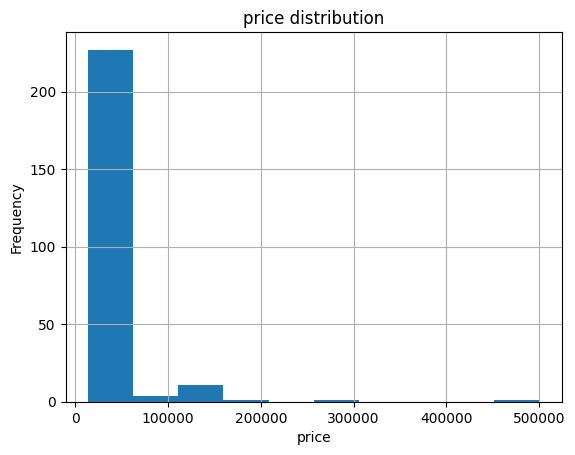

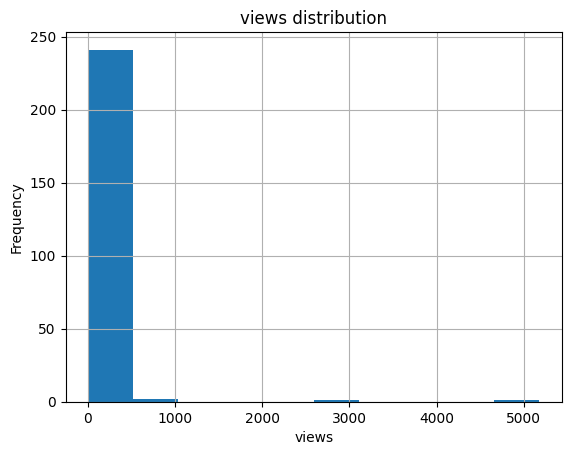

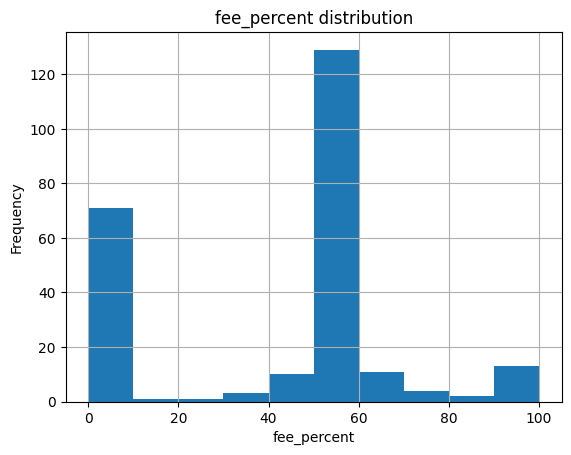

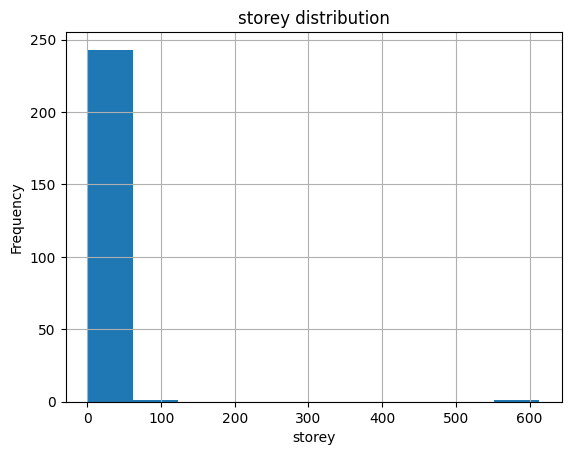

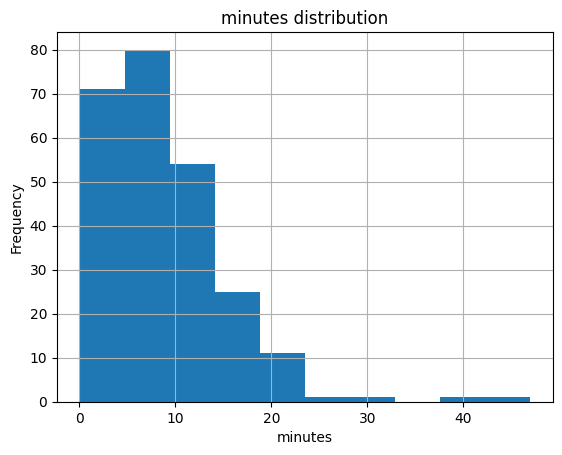

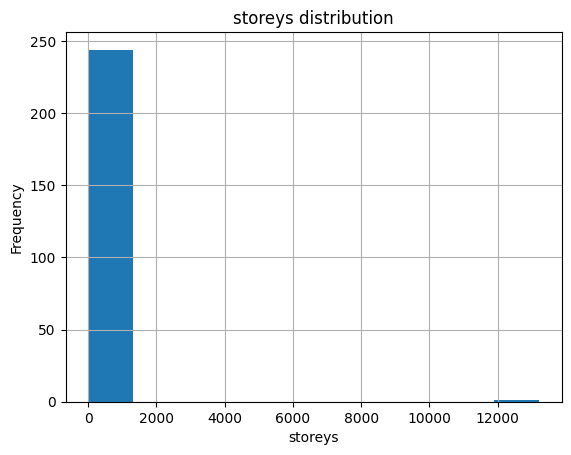

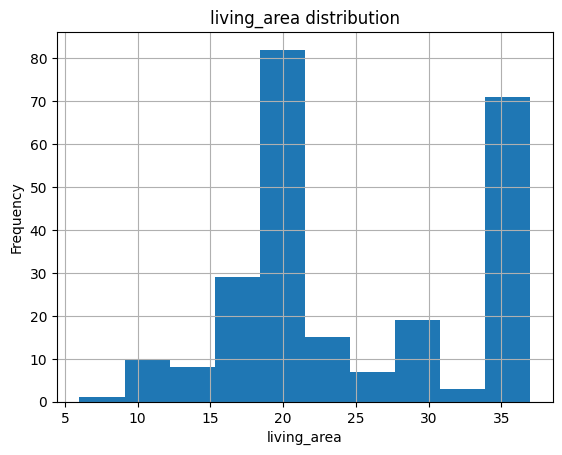

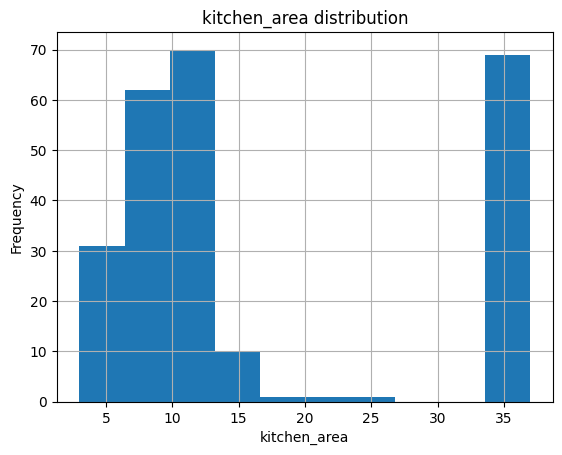

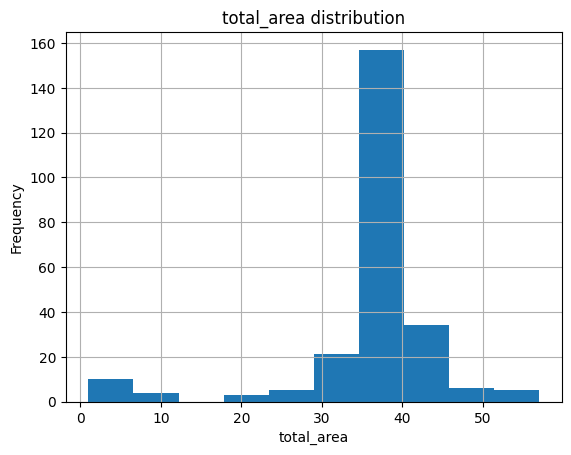

In [10]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

numeric_cols = df.select_dtypes([int, float]).columns
for col in tqdm(numeric_cols):
    ax = df[col].hist()
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()

Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot. Нариcуйте с её помощью не менее трёх scatterplot. (4)

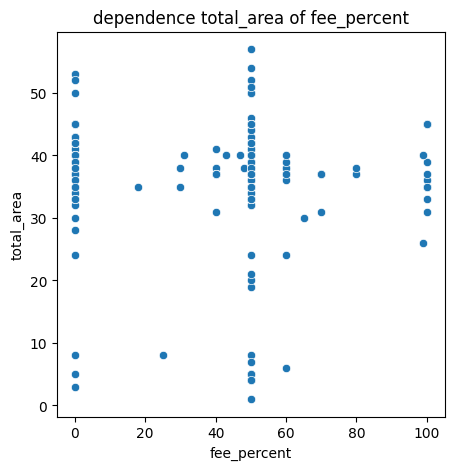

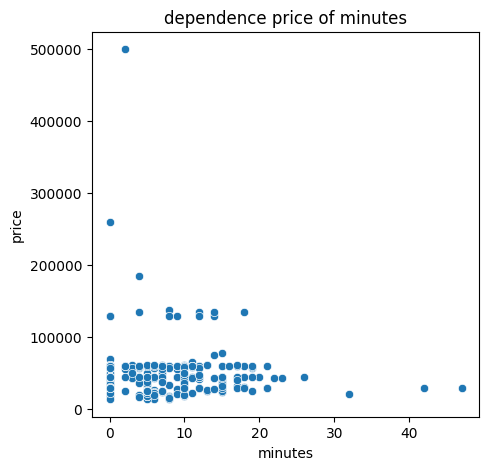

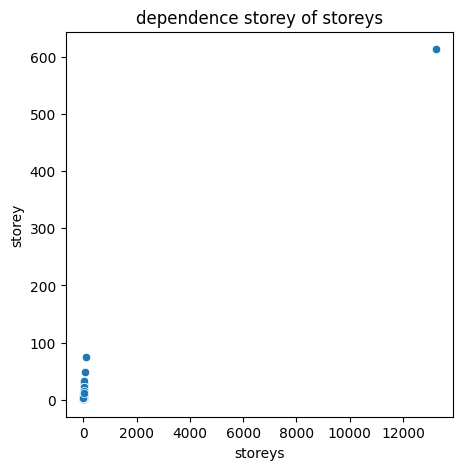

In [15]:
import seaborn as sns

def show_scatter_plot(df, cols, fig_title='scatter_plot', axes_names=['x', 'y']):
    fig = plt.figure(figsize=(5, 5))
    plt.title(fig_title)
    plt.xlabel(axes_names[0])
    plt.ylabel(axes_names[1])
    sns.scatterplot(df, x=cols[0], y=cols[1])
    plt.show()

show_scatter_plot(df, ['fee_percent', 'total_area'], 'dependence total_area of fee_percent', ['fee_percent', 'total_area'])
show_scatter_plot(df, ['minutes', 'price'], 'dependence price of minutes', ['minutes', 'price'])
show_scatter_plot(df, ['storeys', 'storey'], 'dependence storey of storeys', ['storeys', 'storey'])

Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (1)

In [12]:
sns.pairplot(df, kind='scatter')

Error in callback <function flush_figures at 0x79b892129ab0> (for post_execute):


KeyboardInterrupt: 

Нарисуйте boxplot переменной price. (2)

{'whiskers': [<matplotlib.lines.Line2D at 0x79b84fa2a9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x79b84fa2af20>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b84fa2a740>],
 'medians': [<matplotlib.lines.Line2D at 0x79b84fa2b460>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b84fa2b700>],
 'means': []}

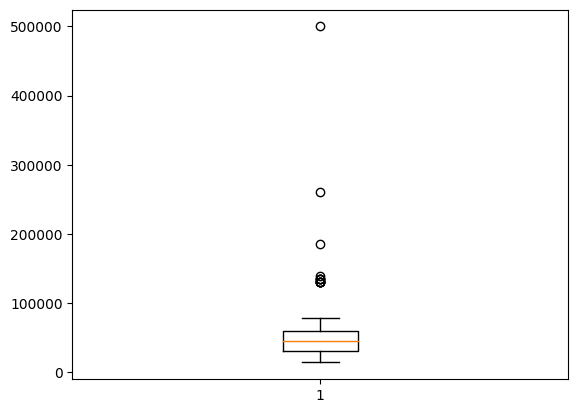

In [13]:
plt.boxplot(df['price'])

Нарисуйте еще какой-нибудь график, который считайте нужным. (2)

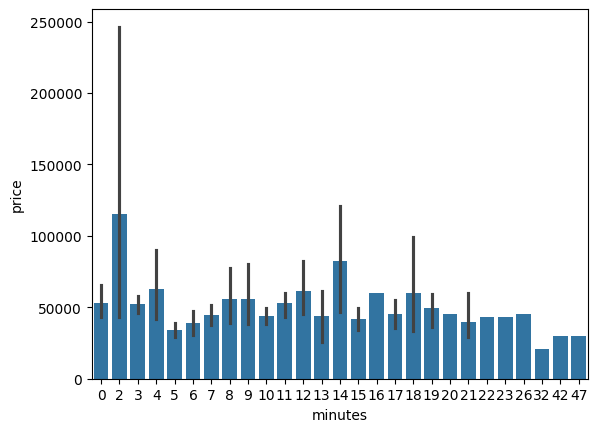

In [14]:
sns.barplot(df, x='minutes', y='price')
plt.show()

Какие выводы можно сделать из визуализаций 7-12? (2) Ответ текстом

В датасете много выбросов

Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (3) Ответ текстом

In [28]:
corr_table = df.corr(numeric_only=True)
corr_table

ValueError: could not convert string to float: 'transport'

<Axes: >

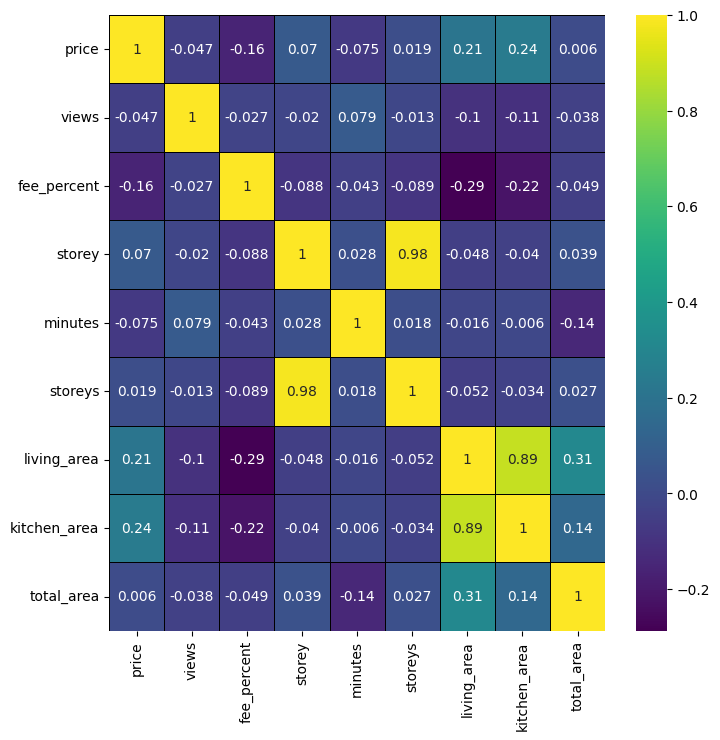

In [17]:
fig , ax = plt.subplots(figsize = (8,8))

sns.heatmap(corr_table,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="black", annot_kws = {'size':10})

Линейная связь между storey & storeys, living_area & kitchen_area и наоборот. Также слабая обратная линейная связь есть между fee_percent и living_area

Часть 2. Построение модели. 30 баллов
Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные.
Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (5)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_1 = df.select_dtypes([int, float])
X = df_1.drop('price', axis=1)
y = df_1['price']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

def getLinearRegressionWithStandardScaler():
    scaler = StandardScaler()
    scaler.fit(train_x, train_y)
    train_x_scaler = scaler.transform(train_x)
    test_x_scaler = scaler.transform(test_x)

    lr = LinearRegression()
    lr.fit(train_x_scaler, train_y)
    return lr.predict(test_x_scaler)

getLinearRegressionWithStandardScaler()

array([ 32234.95010431,  68910.21038386,  80194.19170059,  65627.34025999,
        63548.70116815,  47127.16920764,  62777.07539986,  70341.14637663,
       104095.60192433,  76778.70785851,  42781.77161986,  31781.34068006,
        60375.11005553,  77626.20832774,  74201.08706526,  81226.23861877,
        74829.7207571 ,  33871.31308475,  56798.81763874,  18872.18098268,
        42475.03422126,  40521.22442624,  42032.76650975,  40334.16493204,
        59812.92489147,  79636.3916785 ,  44372.14653785,  71284.87810342,
        71986.77062242,  60416.97201058,  53231.45080704,  30053.98973025,
        36799.98323852,  42796.82471516,  47698.92646844,  56627.1808364 ,
        44252.30206196,  69431.98971154,  46891.86686927,  52162.58057238,
        42766.61678573,  56868.45929754,  45926.5433417 ,  33602.27554795,
        32597.99441521,  31932.77346232,  39625.238406  ,  34022.06263957,
        55314.70173298,  30044.58610707,  64557.48617471,  38923.99552087,
        71047.91271928,  

Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (5)

In [39]:
pred_test = getLinearRegressionWithStandardScaler()
MSE(test_y, pred_test), RMSE(test_y, pred_test)

(1261190058.5519388, 35513.237793137625)

Закодируйте переменные way и provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (5)

In [40]:
df_with_cat = pd.get_dummies(df, columns = ['way', 'provider']).select_dtypes([int, float, bool])
X = df_with_cat.drop('price', axis=1)
y = df_with_cat['price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

pred_test = getLinearRegressionWithStandardScaler()
MSE(test_y, pred_test), RMSE(test_y, pred_test)

(1261190058.5519388, 35513.237793137625)

Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем Q3+1.5∗IQR,
где IQR - межквартильный размах, Q3 - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (5)

In [41]:
def remove_outliers(train_x, train_y):
    IQR = train_y.quantile(0.75) - train_y.quantile(0.25)
    h = train_y.quantile(0.75) + 1.5 * IQR
    return train_x[train_y.between(0, h)], train_y[train_y.between(0, h)]

train_x, train_y = remove_outliers(train_x, train_y)

pred_test = getLinearRegressionWithStandardScaler()
MSE(test_y, pred_test), RMSE(test_y, pred_test)

(1320463689.9619107, 36338.18501193904)

Попробуйте написать свою реализацию функций MSE и RMSE. Функции должна принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат.
Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (6) Напоминаем, что
MSE=1n∑ni=1(yi−yi^)2, где yi - истинное значение на i-ом наблюдении, yi^ - предсказание модели на i-ом наблюдении.
Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [42]:
def getMineMSE(test, pred):
    return np.average((test_y - pred_test) ** 2)

def getMineRMSE(test, pred):
    return np.average((test_y - pred_test) ** 2) ** (1/2)

getMineMSE(test_y, pred_test), getMineRMSE(test_y, pred_test)

(1320463689.9619107, 36338.18501193904)

In [43]:
getMineMSE(test_y, pred_test)-MSE(test_y, pred_test), getMineRMSE(test_y, pred_test)-RMSE(test_y, pred_test)

(0.0, 0.0)

Попробуйте улучшить модель, добавив еще какое-нибудь преобразование (например, можете оставить только часть столбцов, добавить новые признаки, закодировать переменную metro и т.п.). Посчитайте метрики. Удалось ли улучшить модель? (4)
Примечание. Любой разумный технически верно проведенный эксперимент засчитывается, даже если метрику улучшить не удалось.

In [60]:
df_with_cat['median_price_for_metro'] = df['metro'].apply(lambda x: df[df['metro'] == x]['price'].median())
#df_with_cat = df_with_cat.drop(columns='fee_percent')
df_with_cat

X = df_with_cat.drop('price', axis=1)
y = df_with_cat['price']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

def remove_outliers_2(train_x, train_y):
    IQR = train_y.quantile(0.99) - train_y.quantile(0.01)
    h = train_y.quantile(0.99) + 1.5 * IQR
    return train_x[train_y.between(0, h)], train_y[train_y.between(0, h)]

train_x, train_y = remove_outliers_2(train_x, train_y)

pred_test = getLinearRegressionWithStandardScaler()
MSE(test_y, pred_test), RMSE(test_y, pred_test)

(138720793.2399197, 11777.979166220312)